<a href="https://colab.research.google.com/github/Namyalg/MLH_script/blob/master/Edge_detection_with_sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Import and dependencies
import numpy as np
import cv2

In [9]:
#Google Colab does not support cv.imshow(), hence the change
from google.colab.patches import cv2_imshow
from math import sqrt, atan

In [10]:
#This script can be used for edge-detection without the use of any inbuilt openCV libraries
#Here the sobel filter is applied after blurring the image.

kernelblur = np.array([1/16, 1/8, 1/16, 1/8, 1/4, 1/8, 1/16, 1/8, 1/16]).reshape(3, 3)
kernelsobelX = np.array([-1, -2, -1, 0, 0, 0, 1, 2, 1]).reshape(3, 3)
kernelsobelY = kernelsobelX.transpose()

In [11]:
def convolute(img, kernel, height, width):
  pixels = []
  #pixels are extracted from the image converted to grayscale
  for i in range(height):
    for j in range(width):
      pixels.append(img[i, j])

  #The pixels array is resized in accordance with the size of the image
  pixels = np.array(pixels).reshape(height, width)

  #To handle the edge cases, sentinel values are used
  #The pixels array is bound by zeros on all edges

            # 00000000
            # 0PIXELS0
            # 00000000
  #This is done to ensure that the kernel is applied to all the pixels
  #Sentinel values to ensure the edges arent missed out
  #Along the rows and columns
  pixels = np.insert(pixels, [0, height], np.zeros(len(pixels[0])), axis = 0)
  pixels = np.insert(pixels, [0, width], np.zeros((len(pixels[:, 0]), 1)), axis = 1)
  apply_filter = []
  for i in range(1, height):
    for j in range(1, width):
      temp = pixels[i:i+3, j:j+3]
      product = np.multiply(temp, kernel)
      apply_filter.append(sum(sum(product)))

  #The pixels are converted back to the image
  #The size of the image reduces on applying convolution
  apply_filter = np.array(apply_filter).reshape(height-1, width-1)
  return(apply_filter)


In [14]:
def sobel(img):
  height = img.shape[0]
  width = img.shape[1]

  #The image is blurred, so the noise is removed
  blur = convolute(img, kernelblur, height, width)

  height = height - 1
  width = width - 1
  
  #The sobel filter is applied in the X and Y direction separately
  convoluted_Y = convolute(blur, kernelsobelX, height, width)
  convoluted_X = convolute(blur, kernelsobelY, height, width)

  #Every pixel in convoluted_X can be called gx, in convoluted_Y can be called gy,
  #The resultant will be sqrt(pow(gx**2) + pow(gy**2))
  resultant = []
  for i in range(height - 1):
    for j in range(width - 1):
      in_x = pow(convoluted_X[i, j], 2)
      in_y = pow(convoluted_Y[i, j], 2)
      gradient = sqrt(in_x + in_y)
      resultant.append(gradient) 
  resultant = np.array(resultant).reshape(height - 1, width - 1)
  cv2_imshow(resultant)


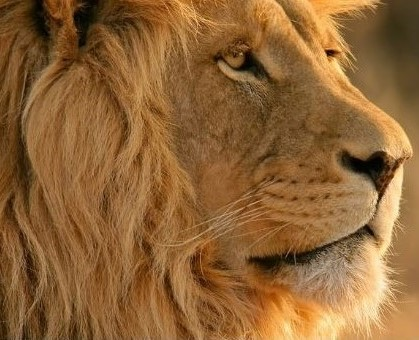



Colored Image




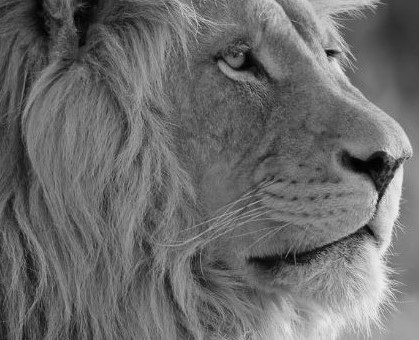



Grayscale Image




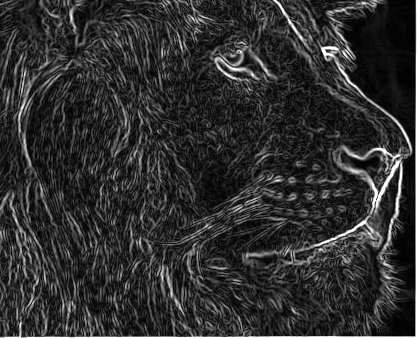



Image after edge detection


In [19]:
if __name__ == "__main__":
    #The 0, converts the image to grayscale 
    colored = cv2.imread("/content/before.jpg")
    cv2_imshow(colored)
    print("\n\nColored Image\n\n")
    img = cv2.imread("/content/before.jpg", 0)
    cv2_imshow(img)
    print("\n\nGrayscale Image\n\n")
    sobel(img)
    print("\n\nImage after edge detection")